In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 11)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le= LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.shape

(10000, 11)

In [13]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
df=pd.get_dummies(df, columns=['Geography'],dtype=int,drop_first=True)

In [15]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [16]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [17]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
X_train_scaled.shape

(8000, 11)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-06-21 10:43:35.971672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750502616.002132     126 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750502616.010829     126 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
model= Sequential()
model.add(Dense(11,activation='relu',input_dim= 11 ))  ##first hidden layer connect to 11 input features
model.add(Dense(11,activation='relu')) ##second hidden layer connected to the first hidden layer
model.add(Dense(1,activation='sigmoid')) ##output  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-21 10:43:39.478159: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    optimizer='adam',           # Optimizer to update weights
    loss='binary_crossentropy', # Loss function for binary classification
    metrics=['accuracy']        # Track accuracy during training
)

In [28]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5489 - loss: 0.6893 - val_accuracy: 0.7987 - val_loss: 0.4819
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7973 - loss: 0.4733 - val_accuracy: 0.8056 - val_loss: 0.4418
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7935 - loss: 0.4608 - val_accuracy: 0.8087 - val_loss: 0.4290
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - loss: 0.4349 - val_accuracy: 0.8138 - val_loss: 0.4232
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8108 - loss: 0.4361 - val_accuracy: 0.8188 - val_loss: 0.4196
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8222 - loss: 0.4187 - val_accuracy: 0.8169 - val_loss: 0.4155
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8248 - loss: 0.4153 - val_accuracy: 0.8256 - val_loss: 0.4097
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8377 - loss: 0.3956 - val_accu

In [31]:
model.layers[0].get_weights()

[array([[ 0.02379791, -0.02519189, -0.00952973,  0.29221138, -0.005772  ,
         -0.11698116,  0.1493324 , -0.06826637,  0.05191164, -0.516194  ,
          0.094069  ],
        [-0.42711163,  0.2698678 ,  0.37300164,  0.02129703, -0.43538168,
         -0.47295716,  0.56863713, -0.03003283,  0.3123094 ,  0.39519498,
          0.13045165],
        [-0.8530608 , -0.37168828, -0.22736727, -0.79614574,  0.02698752,
         -0.71480787,  0.24485806, -0.21576524, -0.89790285,  0.86455363,
          0.18527257],
        [-0.08942098, -0.09218822, -0.04860453,  0.00318012, -0.06065874,
         -0.03847615,  0.21317315, -0.14180025, -0.04267655, -0.38387752,
         -0.07773726],
        [-0.351213  ,  0.00183858, -0.8280265 ,  0.7406164 ,  0.16245659,
          0.31744236,  0.13646339,  0.36582285, -0.2953478 ,  0.54740864,
          0.25081638],
        [-0.0408593 , -0.5610061 ,  0.04374567, -0.20243917,  0.7088968 ,
          0.20341313,  0.9113246 ,  1.299771  ,  0.29829118, -0.3204385

In [32]:
model.layers[1].get_weights()

[array([[-0.4822551 , -0.43786663,  0.47879863,  0.3009058 ,  0.1795778 ,
          0.24820395, -0.16320957,  0.5108374 , -0.0037816 , -0.90049815,
         -0.25631404],
        [ 0.42617652,  0.51394296, -0.31910482,  0.01453503, -0.3265584 ,
          0.06126884,  0.2552599 , -0.73338974, -0.04328017,  0.28880876,
         -0.4265553 ],
        [-0.5076034 , -1.0290779 , -0.01798146,  0.11493611,  0.70725477,
          0.2782074 ,  0.81666386,  0.5488388 ,  0.29469135,  0.7752068 ,
          0.00613601],
        [-0.8771915 ,  0.66394943,  0.5440982 , -0.6381097 ,  0.01682266,
          0.26788574,  0.33540705, -0.26865667,  0.58829814, -0.07288498,
         -0.04967842],
        [ 0.00362094,  0.0559051 ,  0.21898401,  0.4650207 ,  0.25685233,
          0.8197121 ,  0.5020315 , -0.10665132, -0.5394944 , -0.14217874,
          0.12982173],
        [-0.01139218, -0.28364608, -0.33865952,  0.02344137, -0.19257754,
          0.7371421 ,  0.09425867, -0.43506774,  0.4911989 , -0.5357243

In [33]:
model.layers[2].get_weights()

[array([[ 1.1108011 ],
        [ 0.8819043 ],
        [-0.13097799],
        [ 0.6421416 ],
        [-0.31538248],
        [-0.34390426],
        [-0.57171494],
        [ 1.4438527 ],
        [ 0.7846381 ],
        [ 0.9377548 ],
        [ 1.4037911 ]], dtype=float32),
 array([-0.2671499], dtype=float32)]

In [35]:
y_pred= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [36]:
y_pred

array([[0.03809537],
       [0.00751799],
       [0.10337106],
       ...,
       [0.7807293 ],
       [0.12537852],
       [0.19465363]], dtype=float32)

In [39]:
y_pred= np.where(y_pred>0.5,1,0)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86

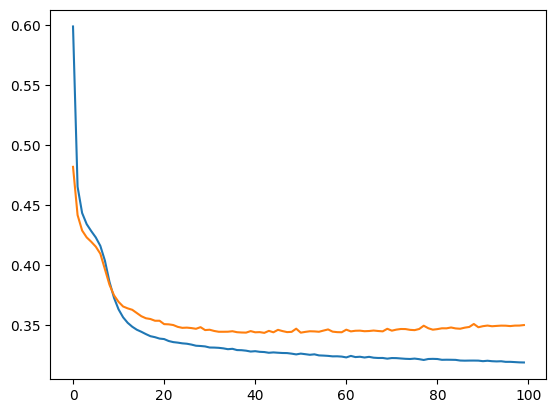

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history[''])
plt.plot(history.history['val_loss'])

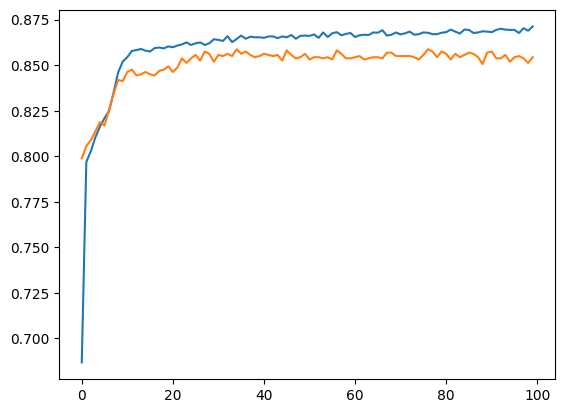

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])